In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import load_diabetes


In [ ]:
data = load_diabetes()
X = data.data
y = data.target
threshold = 140
y_binary = (y > threshold).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_prob[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        72
           1       0.81      0.79      0.80        61

    accuracy                           0.82       133
   macro avg       0.82      0.82      0.82       133
weighted avg       0.82      0.82      0.82       133



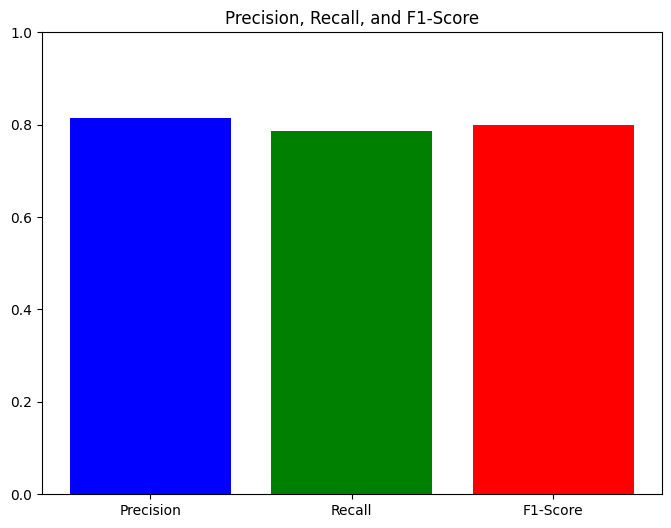

In [ ]:
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1_score]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1-Score')
plt.show()

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc_value = auc(fpr, tpr)



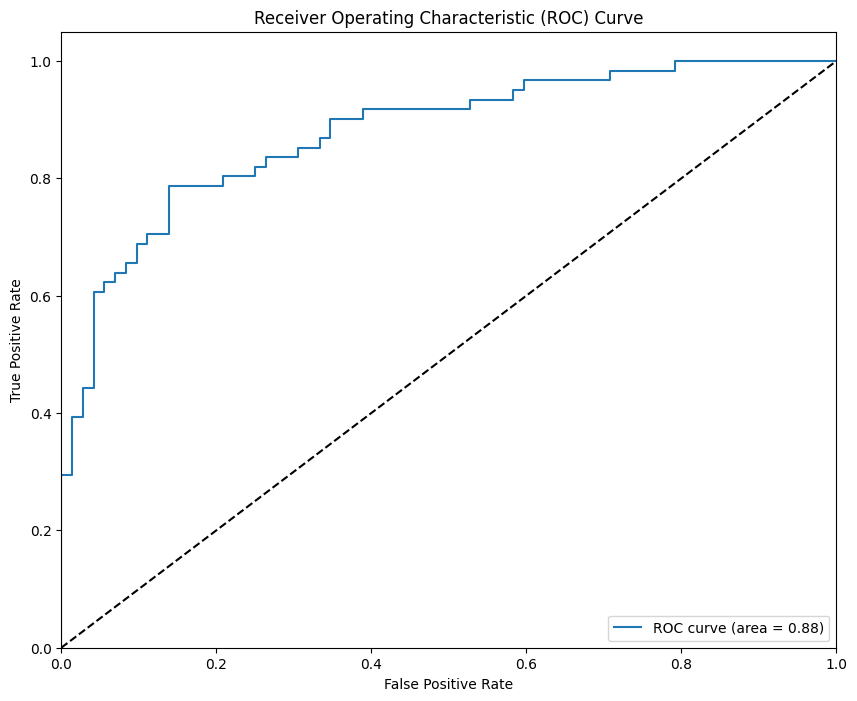

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

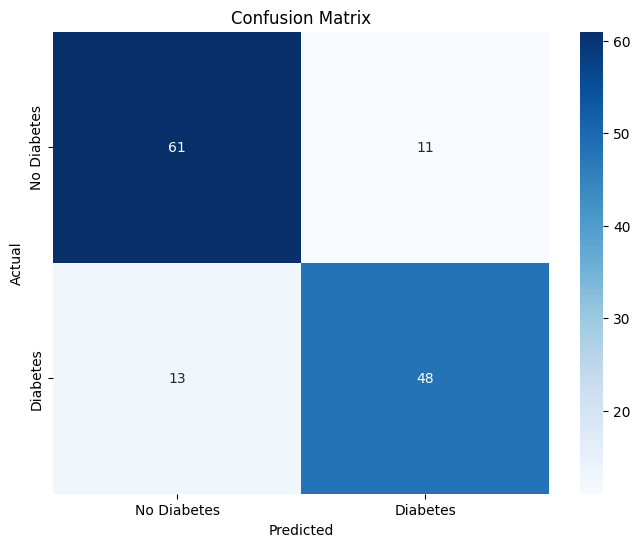

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()